## Topic Modeling

In [1]:
import pyLDAvis.gensim
import pickle
import matplotlib.pyplot as plt
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from gensim.models import LsiModel
from gensim import corpora
import pandas as pd
import nltk
nltk.download('stopwords')


/Users/ruqinchang/opt/anaconda3/lib/python3.9/site-packages/gensim/matutils.py:22: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruqinchang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data Preprocessing

In [2]:
# Reference: https://www.datacamp.com/tutorial/discovering-hidden-topics-python
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


In [3]:
df = pd.read_csv('poki.csv')


In [4]:
text = df.text
text_primary = df[(df['grade'] >= 1) & (df['grade'] <= 5)].text
text_middle = df[(df['grade'] >= 6) & (df['grade'] <= 8)].text
text_high = df[(df['grade'] >= 9) & (df['grade'] <= 12)].text
text_1_3 = df[(df['grade'] >= 1) & (df['grade'] <= 3)].text
text_4_6 = df[(df['grade'] >= 4) & (df['grade'] <= 6)].text
text_7_9 = df[(df['grade'] >= 7) & (df['grade'] <= 9)].text
text_10_12 = df[(df['grade'] >= 10) & (df['grade'] <= 12)].text


In [5]:
clean_text = preprocess_data(text)
clean_text_primary = preprocess_data(text_primary)
clean_text_middle = preprocess_data(text_middle)
clean_text_high = preprocess_data(text_high)
clean_text_1_3 = preprocess_data(text_1_3)
clean_text_4_6 = preprocess_data(text_4_6)
clean_text_7_9 = preprocess_data(text_7_9)
clean_text_10_12 = preprocess_data(text_10_12)


### LDA models

In [6]:
def get_multiple_lda(texts, limit, start=2, step=3):
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(words) for words in texts]

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(
            corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values, dictionary, corpus


In [7]:
model_list_all, coherence_values_all, dictionary_all, corpus_all = get_multiple_lda(texts = clean_text, limit = 10, start=2, step=1) # 4min

In [8]:
model_list_primary, coherence_values_primary, dictionary_primary, corpus_primary = get_multiple_lda(texts = clean_text_primary, limit = 10, start=2, step=1) # 2m
model_list_middle, coherence_values_middle, dictionary_middle, corpus_middle = get_multiple_lda(texts = clean_text_middle, limit = 10, start=2, step=1) # 2m
model_list_high, coherence_values_high, dictionary_high, corpus_high = get_multiple_lda(texts = clean_text_high, limit = 10, start=2, step=1) # 41s

In [9]:
model_list_1_3, coherence_values_1_3, dictionary_1_3, corpus_1_3 = get_multiple_lda(texts = clean_text_1_3, limit = 10, start=2, step=1)
model_list_4_6, coherence_values_4_6, dictionary_4_6, corpus_4_6 = get_multiple_lda(texts = clean_text_4_6, limit = 10, start=2, step=1)
model_list_7_9, coherence_values_7_9, dictionary_7_9, corpus_7_9 = get_multiple_lda(texts = clean_text_7_9, limit = 10, start=2, step=1)
model_list_10_12, coherence_values_10_12, dictionary_10_12, corpus_10_12 = get_multiple_lda(texts = clean_text_10_12, limit = 10, start=2, step=1)

### Find the optimal number of topics for LDA

In [10]:
def print_plot_graph(coherence_values, start, limit, step):
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.title("Choosing Optimal Model with Coherence Scores")
    plt.show()

    # Print the coherence scores
    for m, cv in zip(x, coherence_values):
        print("Number of Topics =", m, " has Coherence Value of", round(cv, 4))


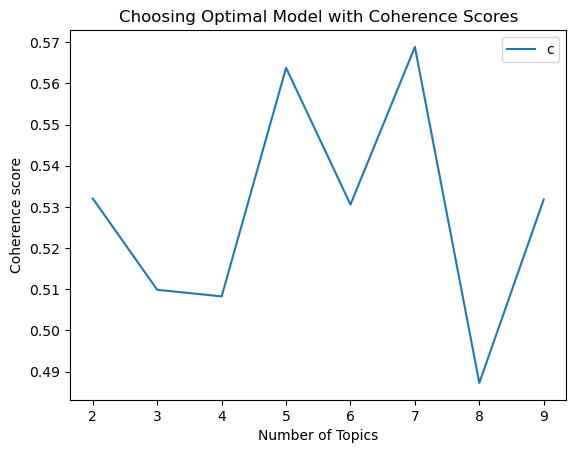

Number of Topics = 2  has Coherence Value of 0.532
Number of Topics = 3  has Coherence Value of 0.5099
Number of Topics = 4  has Coherence Value of 0.5083
Number of Topics = 5  has Coherence Value of 0.5638
Number of Topics = 6  has Coherence Value of 0.5306
Number of Topics = 7  has Coherence Value of 0.5689
Number of Topics = 8  has Coherence Value of 0.4873
Number of Topics = 9  has Coherence Value of 0.5318


In [11]:
print_plot_graph(coherence_values_all, start=2, limit=10, step=1)


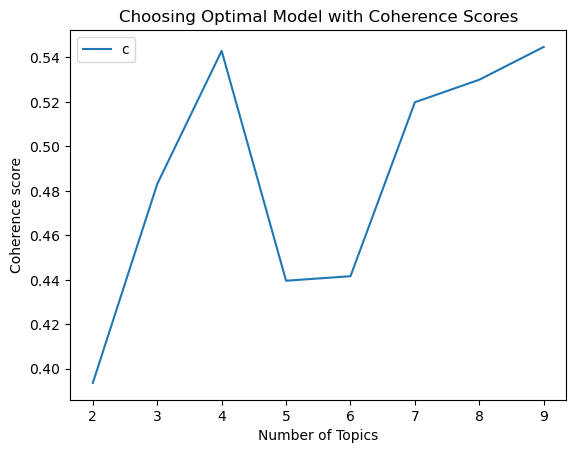

Number of Topics = 2  has Coherence Value of 0.3936
Number of Topics = 3  has Coherence Value of 0.4831
Number of Topics = 4  has Coherence Value of 0.5429
Number of Topics = 5  has Coherence Value of 0.4396
Number of Topics = 6  has Coherence Value of 0.4416
Number of Topics = 7  has Coherence Value of 0.5198
Number of Topics = 8  has Coherence Value of 0.5299
Number of Topics = 9  has Coherence Value of 0.5447


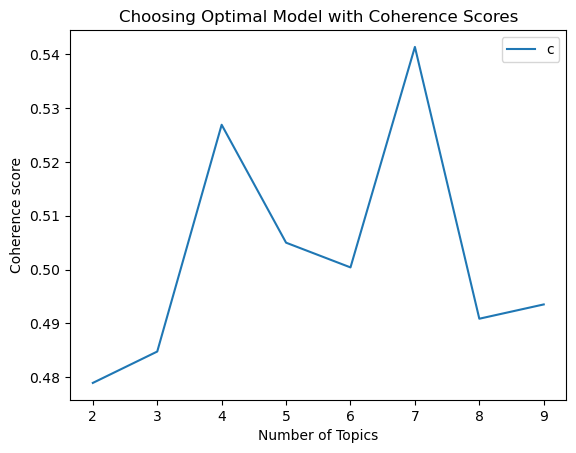

Number of Topics = 2  has Coherence Value of 0.479
Number of Topics = 3  has Coherence Value of 0.4848
Number of Topics = 4  has Coherence Value of 0.5269
Number of Topics = 5  has Coherence Value of 0.505
Number of Topics = 6  has Coherence Value of 0.5004
Number of Topics = 7  has Coherence Value of 0.5413
Number of Topics = 8  has Coherence Value of 0.4909
Number of Topics = 9  has Coherence Value of 0.4935


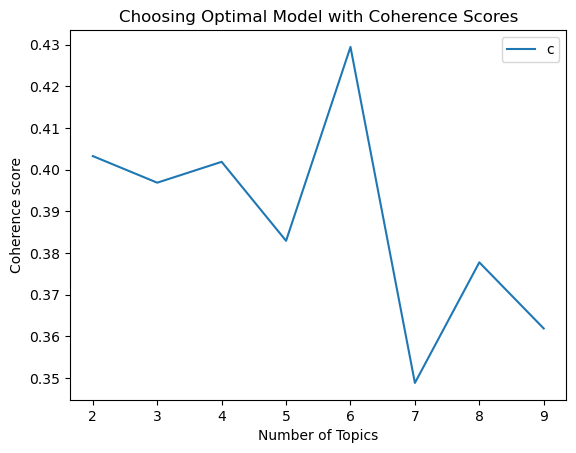

Number of Topics = 2  has Coherence Value of 0.4032
Number of Topics = 3  has Coherence Value of 0.3969
Number of Topics = 4  has Coherence Value of 0.4019
Number of Topics = 5  has Coherence Value of 0.3829
Number of Topics = 6  has Coherence Value of 0.4295
Number of Topics = 7  has Coherence Value of 0.3488
Number of Topics = 8  has Coherence Value of 0.3777
Number of Topics = 9  has Coherence Value of 0.3618


In [12]:
print_plot_graph(coherence_values_primary, start=2, limit=10, step=1)
print_plot_graph(coherence_values_middle, start=2, limit=10, step=1)
print_plot_graph(coherence_values_high, start=2, limit=10, step=1)


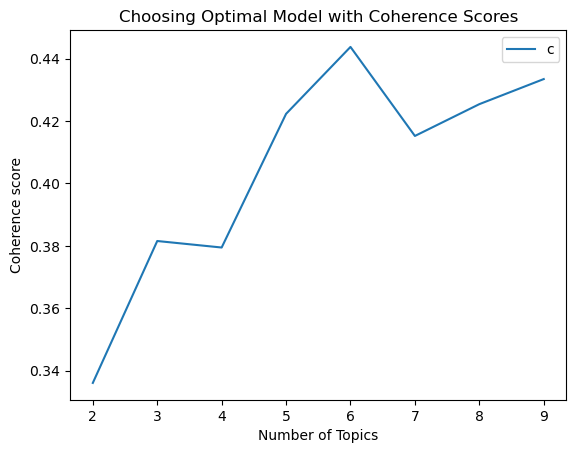

Number of Topics = 2  has Coherence Value of 0.336
Number of Topics = 3  has Coherence Value of 0.3815
Number of Topics = 4  has Coherence Value of 0.3794
Number of Topics = 5  has Coherence Value of 0.4223
Number of Topics = 6  has Coherence Value of 0.4438
Number of Topics = 7  has Coherence Value of 0.4152
Number of Topics = 8  has Coherence Value of 0.4254
Number of Topics = 9  has Coherence Value of 0.4335


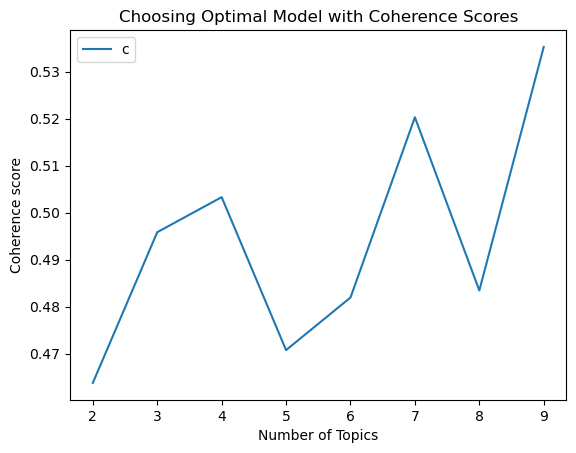

Number of Topics = 2  has Coherence Value of 0.4638
Number of Topics = 3  has Coherence Value of 0.4958
Number of Topics = 4  has Coherence Value of 0.5033
Number of Topics = 5  has Coherence Value of 0.4708
Number of Topics = 6  has Coherence Value of 0.4819
Number of Topics = 7  has Coherence Value of 0.5203
Number of Topics = 8  has Coherence Value of 0.4834
Number of Topics = 9  has Coherence Value of 0.5352


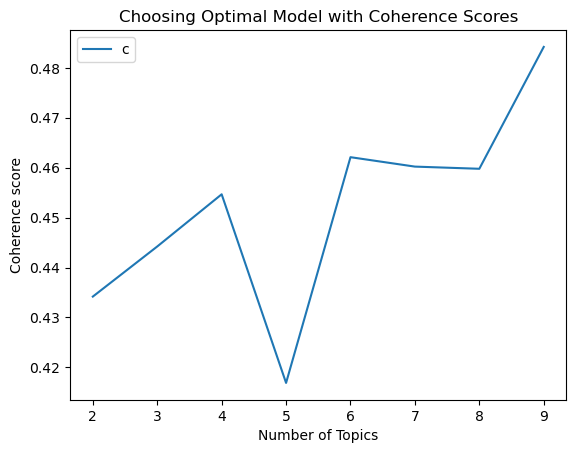

Number of Topics = 2  has Coherence Value of 0.4342
Number of Topics = 3  has Coherence Value of 0.4442
Number of Topics = 4  has Coherence Value of 0.4547
Number of Topics = 5  has Coherence Value of 0.4169
Number of Topics = 6  has Coherence Value of 0.4621
Number of Topics = 7  has Coherence Value of 0.4602
Number of Topics = 8  has Coherence Value of 0.4598
Number of Topics = 9  has Coherence Value of 0.4842


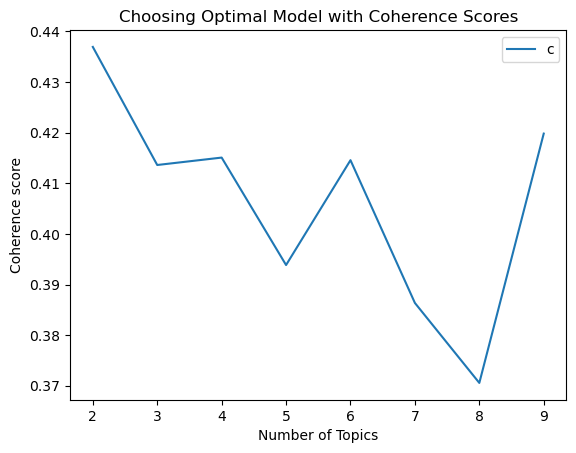

Number of Topics = 2  has Coherence Value of 0.437
Number of Topics = 3  has Coherence Value of 0.4136
Number of Topics = 4  has Coherence Value of 0.4151
Number of Topics = 5  has Coherence Value of 0.3938
Number of Topics = 6  has Coherence Value of 0.4146
Number of Topics = 7  has Coherence Value of 0.3864
Number of Topics = 8  has Coherence Value of 0.3706
Number of Topics = 9  has Coherence Value of 0.4198


In [13]:
print_plot_graph(coherence_values_1_3, start=2, limit=10, step=1)
print_plot_graph(coherence_values_4_6, start=2, limit=10, step=1)
print_plot_graph(coherence_values_7_9, start=2, limit=10, step=1)
print_plot_graph(coherence_values_10_12, start=2, limit=10, step=1)


### Save data

In [14]:
def save_data(lda, dictionary, corpus, suffix, out_dir):
    lda.save(out_dir + 'lda_' + suffix + '.model')
    with open(out_dir + 'dictionary_' + suffix + '.pickle', 'wb') as f:
        pickle.dump(dictionary, f)
    with open(out_dir + 'corpus_' + suffix + '.pickle', 'wb') as f:
        pickle.dump(corpus, f)
    lda_data = pyLDAvis.gensim.prepare(lda, corpus, dictionary, mds='mmds')

    output_path = out_dir + 'lda_' + suffix + '.html'
    pyLDAvis.save_html(lda_data, output_path)


In [15]:
save_data(model_list_all[5], dictionary_all,
          corpus_all, "all", 'topic_model_var/all/')


/Users/ruqinchang/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [16]:
save_data(model_list_primary[2], dictionary_primary,
          corpus_primary, "primary", 'topic_model_var/primary/')
save_data(model_list_middle[5], dictionary_middle,
          corpus_middle, "middle", 'topic_model_var/middle/')
save_data(model_list_high[4], dictionary_high,
          corpus_high, "high", 'topic_model_var/high/')


/Users/ruqinchang/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/ruqinchang/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/ruqinchang/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [17]:
save_data(model_list_1_3[4], dictionary_1_3,
          corpus_1_3, "1_3", 'topic_model_var/1_3/')
save_data(model_list_4_6[7], dictionary_4_6,
          corpus_4_6, "4_6", 'topic_model_var/4_6/')
save_data(model_list_7_9[7], dictionary_7_9,
          corpus_7_9, "7_9", 'topic_model_var/7_9/')
save_data(model_list_10_12[0], dictionary_10_12,
          corpus_10_12, "10_12", 'topic_model_var/10_12/')


/Users/ruqinchang/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/ruqinchang/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/ruqinchang/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/ruqinchang/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 